#Finding the best K using K-means and IOU method.
##COCO JSON File
###keys :

#### 1. Info:

Genric Infoormation on the file like year, version, url, description

#### 2. images:
This contains information of images

1. id - unique value

1. width - width of the image

1. height - height of the image

1. file_name - name of the file

1. license - licence if any

1. date_captured - date when captured

#### 3. annotation
Information about annotation that is done manually in vgg annotator

1. id - unique value

1. image_id - which is the id of images. By this we can join images and annottaion fields

1. segmentation- Co-Ordinates of the bbox. For rectangle there will be 8 coordinates(4 x,y groups) - top-left,top-right, bottom-left, bottom-right.

1. area- area of bounding box

1. bbox - 4 points. top-left x point,top-left y point, width of bbox, height of bbox

1. iscrowd - NA

1. id - ID for each bounding box.

1. image_id - Image ID

1. category_id - NA

#### 4. licence

#### 5. Categories 
This will have the information of the field we annotated.like class, type -- whatever fields we chose




##Normal Json File

1. "8c7a0e82.jpg7937": unique value of an image made by appending a number to image filename
2. filename: image filename
3. size: file size in bytes,
4. regions: "Holds all region information" 
5. shape_attributes: bounding box information
6. name: type of box like rect etc..
7. x,y : centroid of bounding box
8. width, height: width, height of bounding box
9. region_attributes: label information 
10."class" (name of label ): "boots" (label value)
11. file_attributes": file metadata
12.caption: image caption 
13.public_domain: Is it a public image
14.image_url: url of image if retrieved from the internet

For some reason the coco json out has named all my image_ids as 8, but the normal json out from VIA came out fine. So using coco json just to get image sizes which seem to be present in the normal json.

In [3]:
%rm -rf '/content/TSAI-EVA5/'
!git clone --branch ram https://github.com/Anjan-AI/TSAI-EVA5.git
import sys
sys.path.append('/content/TSAI-EVA5/S12/')

Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 465, done.
remote: Counting objects: 100% (465/465), done.
remote: Compressing objects: 100% (397/397), done.
remote: Total 1072 (delta 145), reused 368 (delta 59), pack-reused 607
Receiving objects: 100% (1072/1072), 63.88 MiB | 37.55 MiB/s, done.
Resolving deltas: 100% (400/400), done.


In [1]:
import json
import pandas as pd

In [4]:
with open('/content/TSAI-EVA5/S12/eva5_Ram_coco.json', 'r') as f:
    coco_json = json.load(f)
with open('/content/TSAI-EVA5/S12/eva5_Ram_normal_json.json', 'r') as f:
    normal_json = json.load(f)

In [5]:
normal_json.keys()

dict_keys(['8c7a0e82.jpg7937', '8c7a6c2e.jpg3740', '8c7a9c70.jpg5326', '8c7a49f4.jpg5840', '8c7a58c2.jpg7054', '8c7a3576.jpg4832', '8c7a8476.jpg9799', '8c7aae36.jpg5131', '8c7aae37.jpg4769', '8c7ad1c0.jpg8161', '8c7ae42c.jpg6233', '8c7af8c6.jpg5217', '8c7b0f70.jpg7674', '8c7b58b0.jpg4424', '8c7b72ee.jpg7367', '8c7b72ef.jpg10491', '8c7b72f0.jpg10284', '8c7b489c.jpg6353', '8c7b2014.jpg3561', '8c7b2015.jpg7555', '8c7b2016.jpg8092', '8c7b6518.jpg11592', '8c7b9500.jpg7195', '8c7b9501.jpg5764', '8c7bbd8a.jpg6800', '8c7bcc02.jpg10812', '8c7bd934.jpg12314', '8c7be500.jpg11953', '8c7be501.jpg11638', '8c7be502.jpg6220', '8c7c8e76.jpg10174', '8c7c8e77.jpg12895', '8c7c13e6.jpg8525', '8c7c13e7.jpg7591', '8c7c73f6.jpg10451', '8c7c80a8.jpg10553', '8c7c383a.jpg5544', '8c7c4950.jpg5490', '8c7c5894.jpg7854', '8c7c6734.jpg12345', '8c7ca75c.jpg6677', '8c7ca75d.jpg11163', '8c7ca75e.jpg7123', '8c7cce80.jpg6588', '8c7cce81.jpg12664', '8c7cce82.jpg11762', '8c7cf57a.jpg10171', '8c7cf57b.jpg4735', '8c7cf57c.jpg

Removing wierd keys

In [6]:
normal_json = normal_json.values()

In [11]:
normal_df =  pd.DataFrame(normal_json)

In [15]:
normal_df.tail()

,filename,size,regions,file_attributes
80,8c7ecb0d.jpg,9762,"[{'shape_attributes': {'name': 'rect', 'x': 14...","{'caption': '', 'public_domain': 'no', 'image_..."
81,8c7ecb0e.jpg,8360,"[{'shape_attributes': {'name': 'rect', 'x': 11...","{'caption': '', 'public_domain': 'no', 'image_..."
82,8c7ef250.jpg,8176,"[{'shape_attributes': {'name': 'rect', 'x': 59...","{'caption': '', 'public_domain': 'no', 'image_..."
83,8c79e762.jpg,5264,"[{'shape_attributes': {'name': 'rect', 'x': 3,...","{'caption': '', 'public_domain': 'no', 'image_..."
84,8c79e763.jpg,4938,"[{'shape_attributes': {'name': 'rect', 'x': 10...","{'caption': '', 'public_domain': 'no', 'image_..."


Getting image sizes from coco json

In [12]:
coco_df = pd.DataFrame(coco_json['images'])

In [16]:
coco_df.tail()

,id,width,height,file_name,license,date_captured
80,8,284,177,8c7ecb0d.jpg,0,
81,8,294,171,8c7ecb0e.jpg,0,
82,8,280,180,8c7ef250.jpg,0,
83,8,225,225,8c79e762.jpg,0,
84,8,194,259,8c79e763.jpg,0,


renaming filename to match

In [17]:
coco_df = coco_df.rename(columns={'file_name':'filename'})

In [18]:
coco_df.keys()

Index(['id', 'width', 'height', 'filename', 'license', 'date_captured'], dtype='object')

In [29]:
final_df = pd.merge(coco_df, normal_df, on='filename')

In [30]:
final_df.tail()

,id,width,height,filename,license,date_captured,size,regions,file_attributes
80,8,284,177,8c7ecb0d.jpg,0,,9762,"[{'shape_attributes': {'name': 'rect', 'x': 14...","{'caption': '', 'public_domain': 'no', 'image_..."
81,8,294,171,8c7ecb0e.jpg,0,,8360,"[{'shape_attributes': {'name': 'rect', 'x': 11...","{'caption': '', 'public_domain': 'no', 'image_..."
82,8,280,180,8c7ef250.jpg,0,,8176,"[{'shape_attributes': {'name': 'rect', 'x': 59...","{'caption': '', 'public_domain': 'no', 'image_..."
83,8,225,225,8c79e762.jpg,0,,5264,"[{'shape_attributes': {'name': 'rect', 'x': 3,...","{'caption': '', 'public_domain': 'no', 'image_..."
84,8,194,259,8c79e763.jpg,0,,4938,"[{'shape_attributes': {'name': 'rect', 'x': 10...","{'caption': '', 'public_domain': 'no', 'image_..."


In [31]:
final_df = final_df.drop(['id','license', 'date_captured','date_captured','file_attributes'], axis=1)

In [56]:
final_df['regions'][0]

[{'region_attributes': {'class': 'boots'},
  'shape_attributes': {'height': 226,
   'name': 'rect',
   'width': 196,
   'x': 3,
   'y': 16}}]

Getting bbox dimensions out 

In [76]:
list_ = []
for _, row in final_df.iterrows():
    for i in row['regions']:
        a = row.copy()
        a['bbox_width'] = i['shape_attributes']['width']
        a['bbox_height'] = i['shape_attributes']['height']
        list_.append(a)

In [94]:
final_df = pd.DataFrame(list_)

In [95]:
final_df.tail()

,width,height,filename,size,regions,bbox_width,bbox_height
82,280,180,8c7ef250.jpg,8176,"[{'shape_attributes': {'name': 'rect', 'x': 59...",31,30
82,280,180,8c7ef250.jpg,8176,"[{'shape_attributes': {'name': 'rect', 'x': 59...",17,20
83,225,225,8c79e762.jpg,5264,"[{'shape_attributes': {'name': 'rect', 'x': 3,...",221,163
84,194,259,8c79e763.jpg,4938,"[{'shape_attributes': {'name': 'rect', 'x': 10...",78,95
84,194,259,8c79e763.jpg,4938,"[{'shape_attributes': {'name': 'rect', 'x': 10...",94,85


In [96]:
final_df.shape

(323, 7)

323 Objects in Total

Normalizing bbox width and height

In [97]:
final_df['bbox_width'] = final_df['bbox_width']/final_df['width']
final_df['bbox_height'] = final_df['bbox_height']/final_df['height']
final_df['width'] = final_df['width']/final_df['width']
final_df['height'] = final_df['height']/final_df['height']

In [99]:
final_df.tail()

,width,height,filename,size,regions,bbox_width,bbox_height
82,1.0,1.0,8c7ef250.jpg,8176,"[{'shape_attributes': {'name': 'rect', 'x': 59...",0.110714,0.166667
82,1.0,1.0,8c7ef250.jpg,8176,"[{'shape_attributes': {'name': 'rect', 'x': 59...",0.060714,0.111111
83,1.0,1.0,8c79e762.jpg,5264,"[{'shape_attributes': {'name': 'rect', 'x': 3,...",0.982222,0.724444
84,1.0,1.0,8c79e763.jpg,4938,"[{'shape_attributes': {'name': 'rect', 'x': 10...",0.402062,0.366795
84,1.0,1.0,8c79e763.jpg,4938,"[{'shape_attributes': {'name': 'rect', 'x': 10...",0.484536,0.328185


For Kmeans we only need normalized bbox width and height

In [100]:
final_df = final_df[['bbox_width', 'bbox_height']]

In [101]:
final_df

,bbox_width,bbox_height
0,0.975124,0.900398
1,0.855721,0.752988
2,0.351220,0.865854
2,0.395122,0.182927
3,0.660793,0.716216
...,...,...
82,0.110714,0.166667
82,0.060714,0.111111
83,0.982222,0.724444
84,0.402062,0.366795


Plotting Normalized values

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

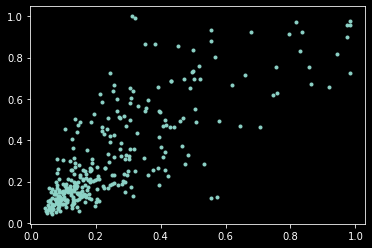

In [104]:
plt.style.use('dark_background')
plt.plot(final_df['bbox_width'],final_df['bbox_height'], '.')

##Elbow Method to find K.

In [105]:
from sklearn.cluster import KMeans
from sklearn import  metrics
from scipy.spatial.distance import cdist
import numpy as np

In [108]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(final_df)
    kmeanModel.fit(final_df)
    distortions.append(sum(np.min(cdist(final_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / final_df.shape[0])

In [109]:
distortions

[0.25310250203571766,
 0.14887115583829721,
 0.11502628457453376,
 0.09955967590962862,
 0.08879219653182689,
 0.0801309252755381,
 0.07321311819808851,
 0.07059702811765992,
 0.0668986614198056]

Text(0.5, 1.0, 'Elbow Method to show optimal K')

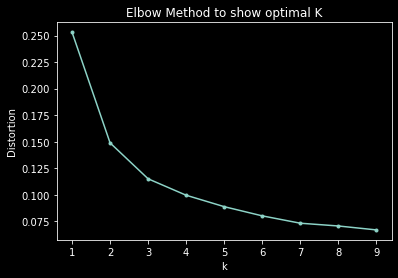

In [111]:
#lets Plot these distortions
plt.style.use('dark_background')
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method to show optimal K')

K = 7  from Elbow Plot


##IOU Method to find out K
IOU(Intersection over union) = intersected area of bbox and anchor box/ Union area of bbox and anchor box

bw = bounding box width, bh - bounding box height, aw - anchor box width, ah - anchor box height

IOU = min(bw,aw) min(bh, ah)/bwbh + awah - min(bw,aw) min(bh, ah)

mean IOU = sum(IOU)/len(IOU)

In [113]:
height = list(final_df['bbox_height'])
width = list(final_df['bbox_width'])
ks = range(1,10)
meaniou = []
for k in ks:
    cl = KMeans(n_clusters=k)
    cl.fit(final_df)
    cx = []
    cy = []
    mapcx  = {}
    mapcy = {}
    iou = []
    for i in range(len(width)):
        
        l = cl.labels_[i]
        cx.append(cl.cluster_centers_[l][0])
        cy.append(cl.cluster_centers_[l][1])
        iou.append(min(width[i] ,cx[i])* min(height[i] , cy[i])/(height[i]*width[i]+ cx[i]*cy[i]- min(width[i] , cx[i])* min(height[i] ,cy[i])))
    meaniou.append(sum(iou)/len(width))

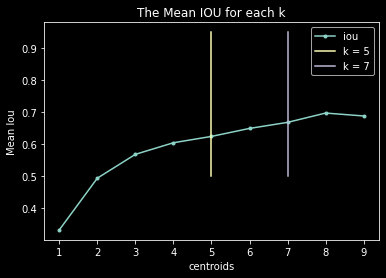

In [116]:
plt.style.use("dark_background")
plt.plot(range(1,10),meaniou,'.-',label = "iou")
plt.plot([5,5],[0.5,0.95],label = "k = 5")
plt.plot([7,7],[0.5,0.95],label = "k = 7")
plt.xlabel('centroids')
plt.ylabel('Mean Iou')
plt.title('The Mean IOU for each k')
plt.legend()
plt.show()

K=5 From the Graph

####K=5

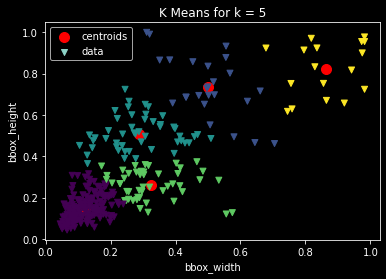

In [119]:
import numpy as np
array_points = np.array(final_df)
cl3 = KMeans(5)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(final_df['bbox_width']), list(final_df['bbox_height']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbox_width')
plt.ylabel('bbox_height')
plt.title('K Means for k = 5')
plt.legend()
plt.show()

####K=7

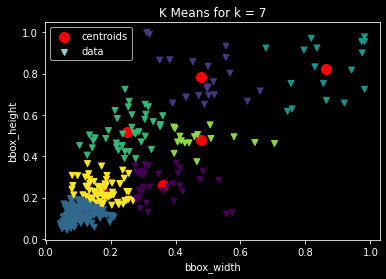

In [120]:
import numpy as np
array_points = np.array(final_df)
cl3 = KMeans(7)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(final_df['bbox_width']), list(final_df['bbox_height']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbox_width')
plt.ylabel('bbox_height')
plt.title('K Means for k = 7')
plt.legend()
plt.show()

####K=7

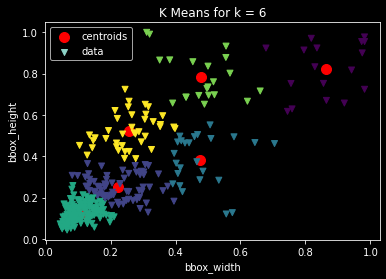

In [121]:
import numpy as np
array_points = np.array(final_df)
cl3 = KMeans(6)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(final_df['bbox_width']), list(final_df['bbox_height']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bbox_width')
plt.ylabel('bbox_height')
plt.title('K Means for k = 6')
plt.legend()
plt.show()

Looking at the plots, the data seems enough differentiated even on K=5, So I think we should choose K=5.